# 1. Imports

In [1]:
## Essenttial
import pandas   as pd
import warnings as wrg
from   IPython.display import Image
import pickle

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

## Owner
from SRLib.Nuter import nuter

## Chart pĺot
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot   as plt
import seaborn             as sns

# 2. Help Functions

## 2.1 Settings

In [22]:
sns.set( rc={'figure.figsize':( 38,13 )} )
#warings ignore
wrg.filterwarnings('ignore')

In [2]:
pd.set_option('display.float_format', lambda x :'%5f' %x)

# 3. Data Load | Cleaning

### 3.2 Data load

In [4]:
data_raw = pd.read_csv( '../data/nuter.csv' )

### 3.3 Rename Columns

In [5]:
data_raw = nuter.data_cleaner( data_raw )

# 4. EDA

## 4.1 General Analysis

### Dimensions

In [33]:
print( 'Dataset shape: {:,} rows, {} columns'.format( data_raw.shape[0], data_raw.shape[1] ) )

Dataset shape: 6,362,620 rows, 11 columns


### Fill NAs

In [34]:
data_raw.isna().sum()

step                0
type                0
amount              0
name_orig           0
old_balance_orig    0
new_balance_orig    0
name_dest           0
old_balance_dest    0
new_balance_dest    0
is_fraud            0
is_flagged_fraud    0
dtype: int64

### General data analysis

In [35]:
display( data_raw[data_raw.is_fraud == 0].head( 4 ) )
display( data_raw[data_raw.is_fraud == 1].head(4) )

,step,type,amount,name_orig,old_balance_orig,new_balance_orig,name_dest,old_balance_dest,new_balance_dest,is_fraud,is_flagged_fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0


,step,type,amount,name_orig,old_balance_orig,new_balance_orig,name_dest,old_balance_dest,new_balance_dest,is_fraud,is_flagged_fraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0


In [36]:
display( data_raw.describe().T )
display( data_raw.select_dtypes( exclude = ['int64', 'float64'] ).describe().T )

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
old_balance_orig,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
new_balance_orig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
old_balance_dest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
new_balance_dest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
is_fraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
is_flagged_fraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


,count,unique,top,freq
type,6362620,5,CASH_OUT,2237500
name_orig,6362620,6353307,C1902386530,3
name_dest,6362620,2722362,C1286084959,113


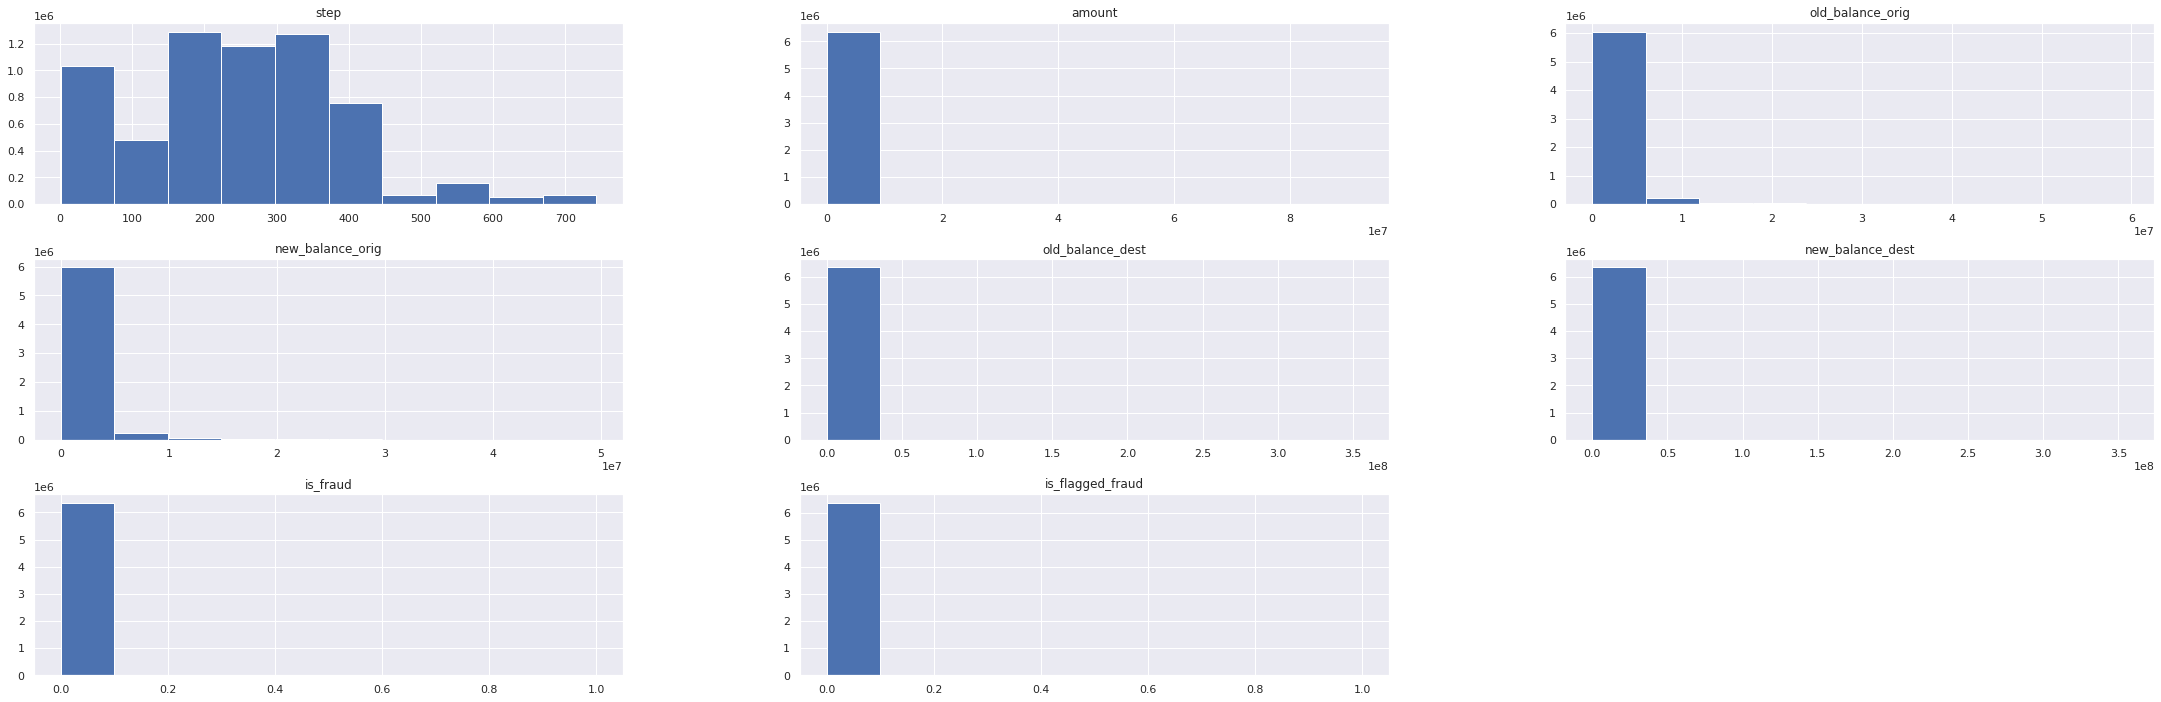

In [37]:
data_raw.hist( figsize = ( 38,12 ) );

In [38]:
data_raw.dtypes


step                  int64
type                 object
amount              float64
name_orig            object
old_balance_orig    float64
new_balance_orig    float64
name_dest            object
old_balance_dest    float64
new_balance_dest    float64
is_fraud              int64
is_flagged_fraud      int64
dtype: object

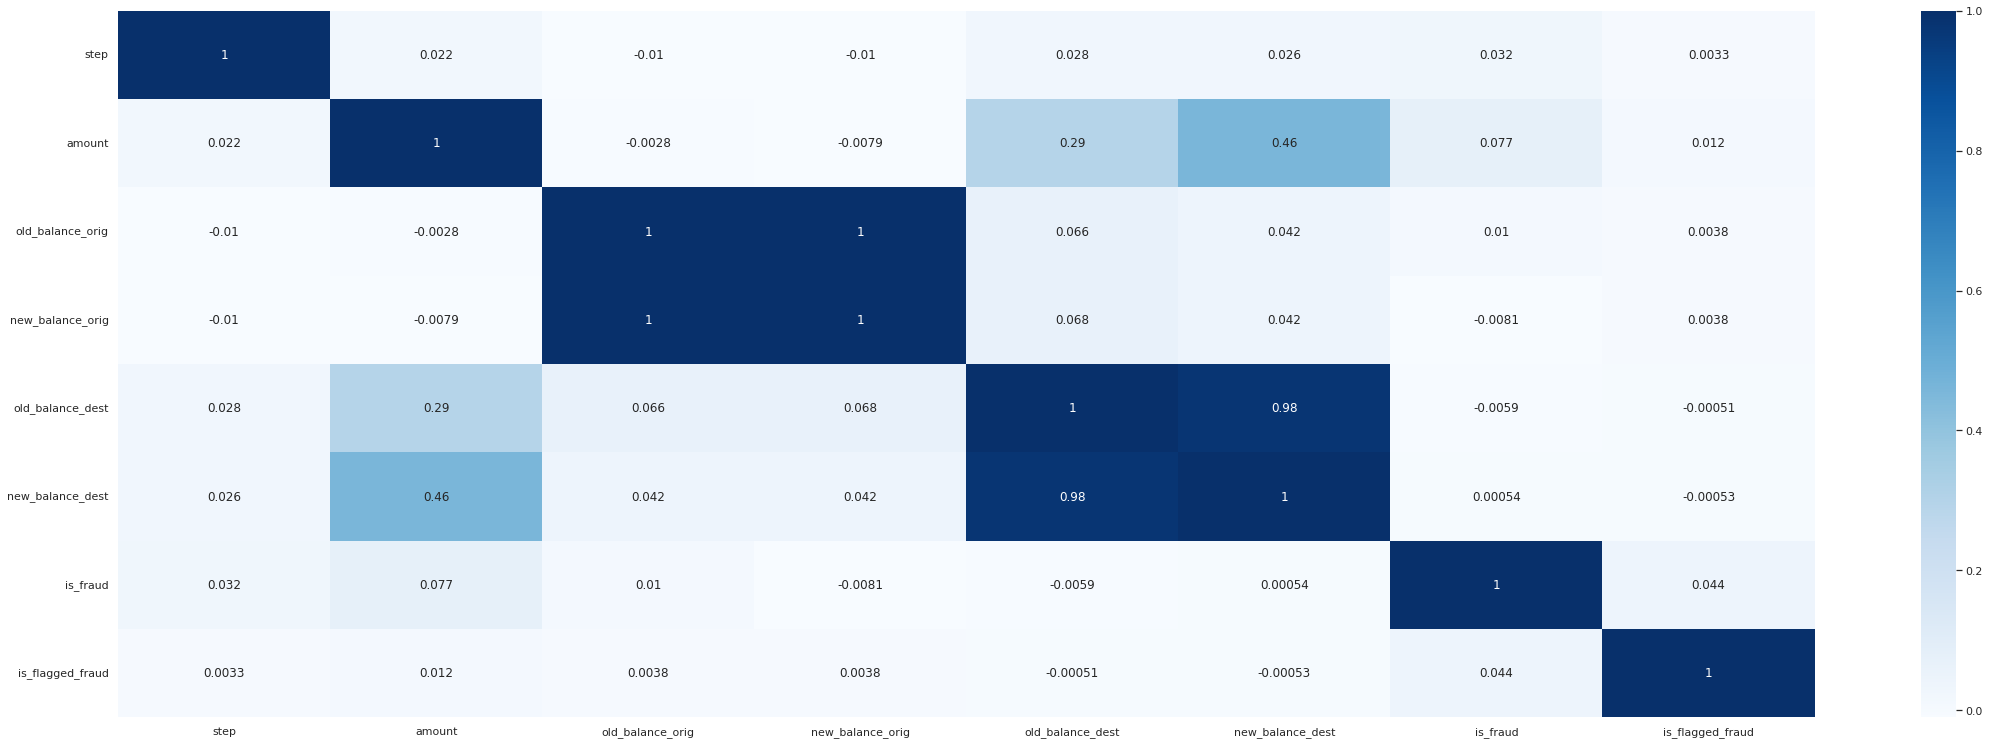

In [39]:
sns.heatmap(
    data_raw.corr( method = 'pearson' ),
    annot = True,
    cmap  = 'Blues'
);

## 4.2 Mind Map & Analysis of possible hypotheses

### Mind Map

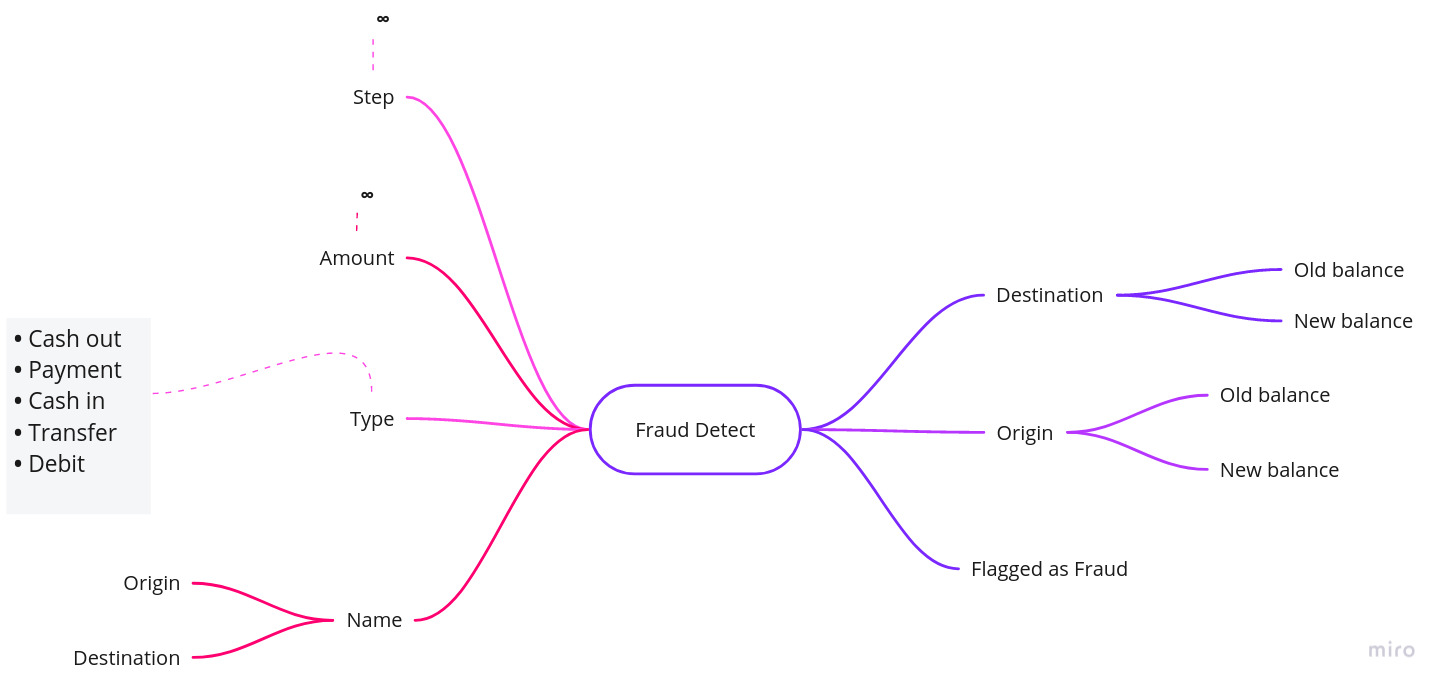

In [40]:
Image( '../img/mind_map.jpg' )

### Hypotheses 

##### Univariate
1. C1590550415, aparece em 72 registros. Analisar de maneira mais detalhada (name_dest);

##### Bivariate 
1. A maior incidência de fraudes, tende a ocorrer em transações do tipo 'CASH OUT' por dificultar o rastreio das transações;

2. Fraudes visam maiores valores transacionais (amount);

3. Contas de origem, tendem a ser zeradas em fraudes (new_balance_orig);

4. Contas marcadas como fraude, sempre são fraudes (flagged_fraud);



## 4.3 Univariate data analysis

### | Is_fraud |&| is_flagged_fraud

Os registros fraudulentos correspondem a 0.13% do conjunto total de dados


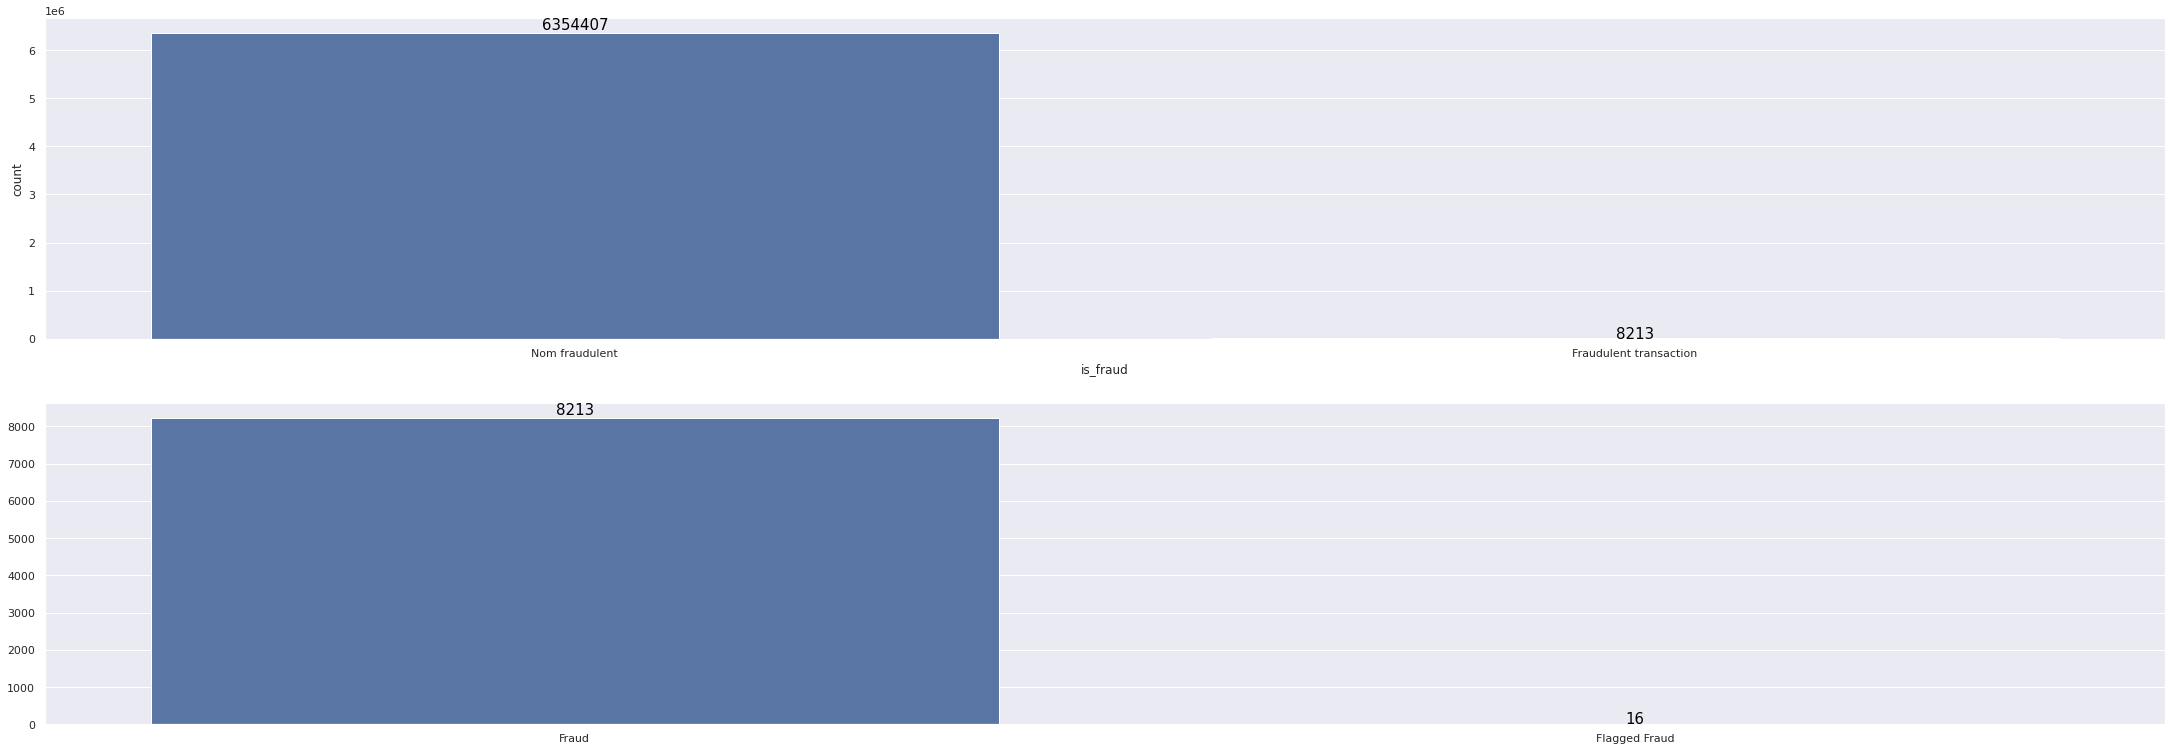

In [41]:
print( f"Os registros fraudulentos correspondem a {( data_raw[data_raw.is_fraud == 1].is_fraud.count() * 100 / data_raw.is_fraud.count() ) :.2f}% do conjunto total de dados" )

plt.subplot( 2,1,1 )

## First graph
ax = sns.countplot( data_raw.is_fraud );
ax.set_xticklabels( [ "Nom fraudulent", "Fraudulent transaction" ] );
nuter.plot_values_vbar( ax )


plt.subplot( 2,1,2 )

##Second Graph
ax1 = sns.barplot(   x = ['Fraud', 'Flagged_fraud'], y = [data_raw.is_fraud[data_raw.is_fraud == 1].count() , data_raw.is_flagged_fraud[data_raw.is_flagged_fraud == 1].count()] );
ax1.set_xticklabels( [ "Fraud", "Flagged Fraud" ] );
nuter.plot_values_vbar( ax1 )



### Type

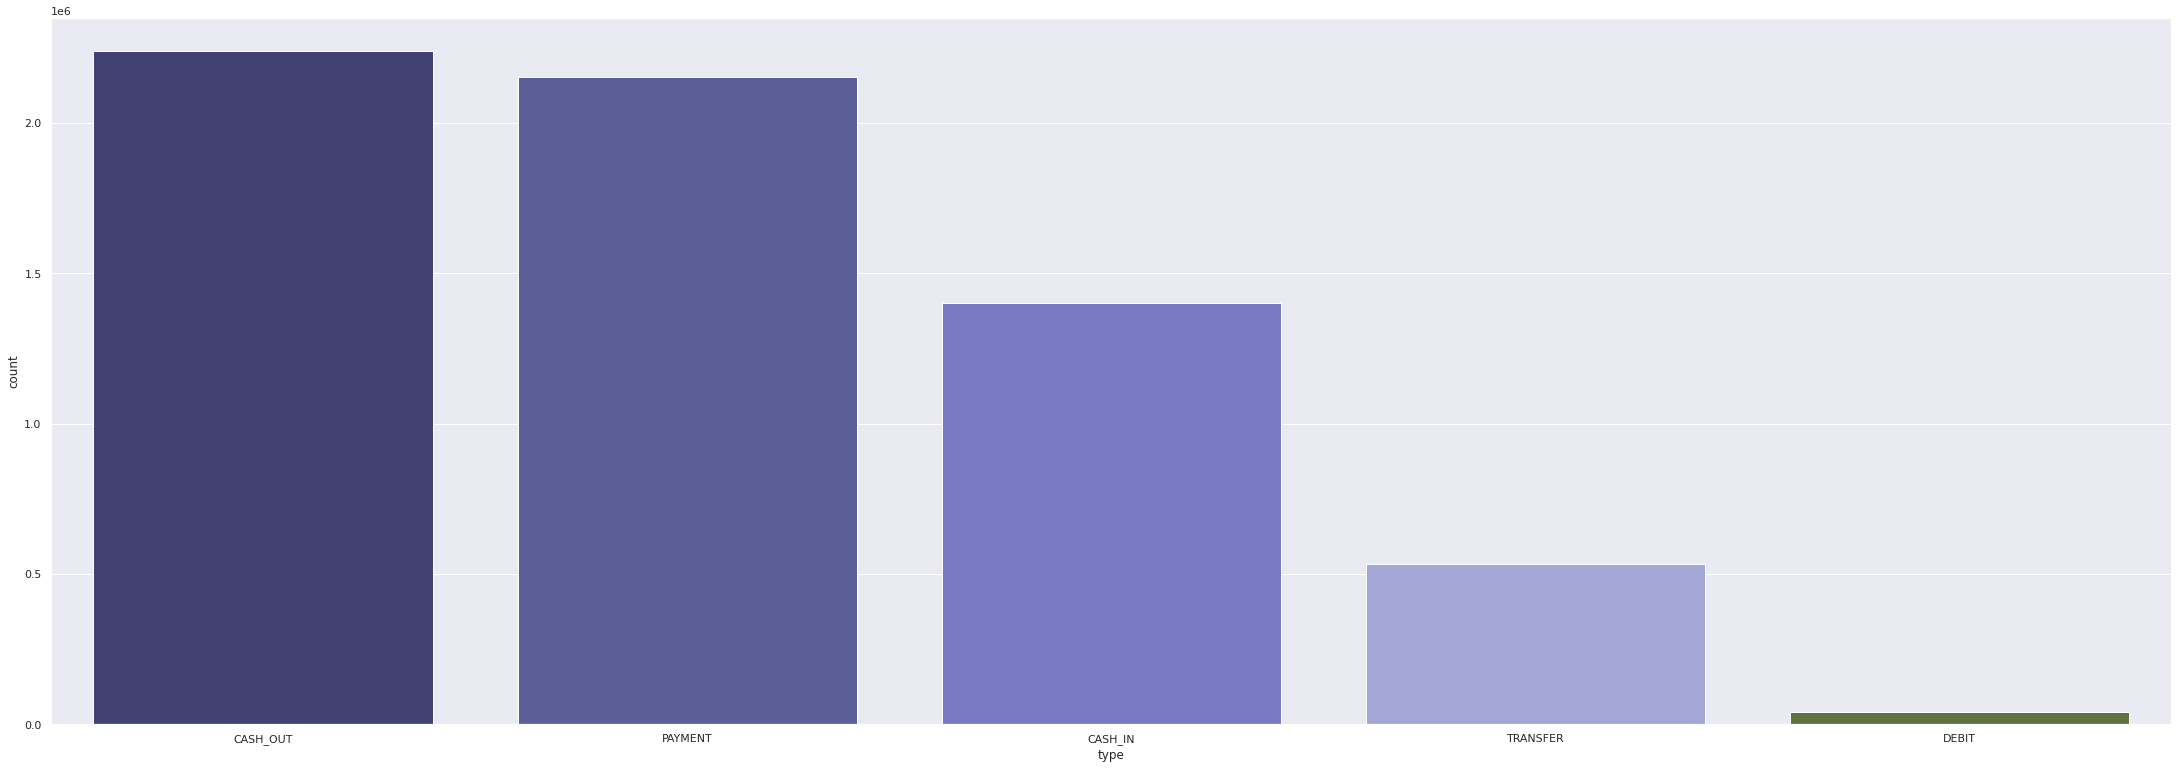

In [42]:
sns.countplot( 
    data_raw.type,
    order = ['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'],
    palette= 'tab20b'
);

### name_dest (C1590550415) 

In [43]:
data_raw.is_fraud[data_raw.name_dest == 'C1590550415'].unique()

array([0])

## 4.4 Bivariate data analysis

### 1. A maior incidência de fraudes, tende a ocorrer em transações do tipo 'CASH OUT' por dificultar o rastreio das transações;


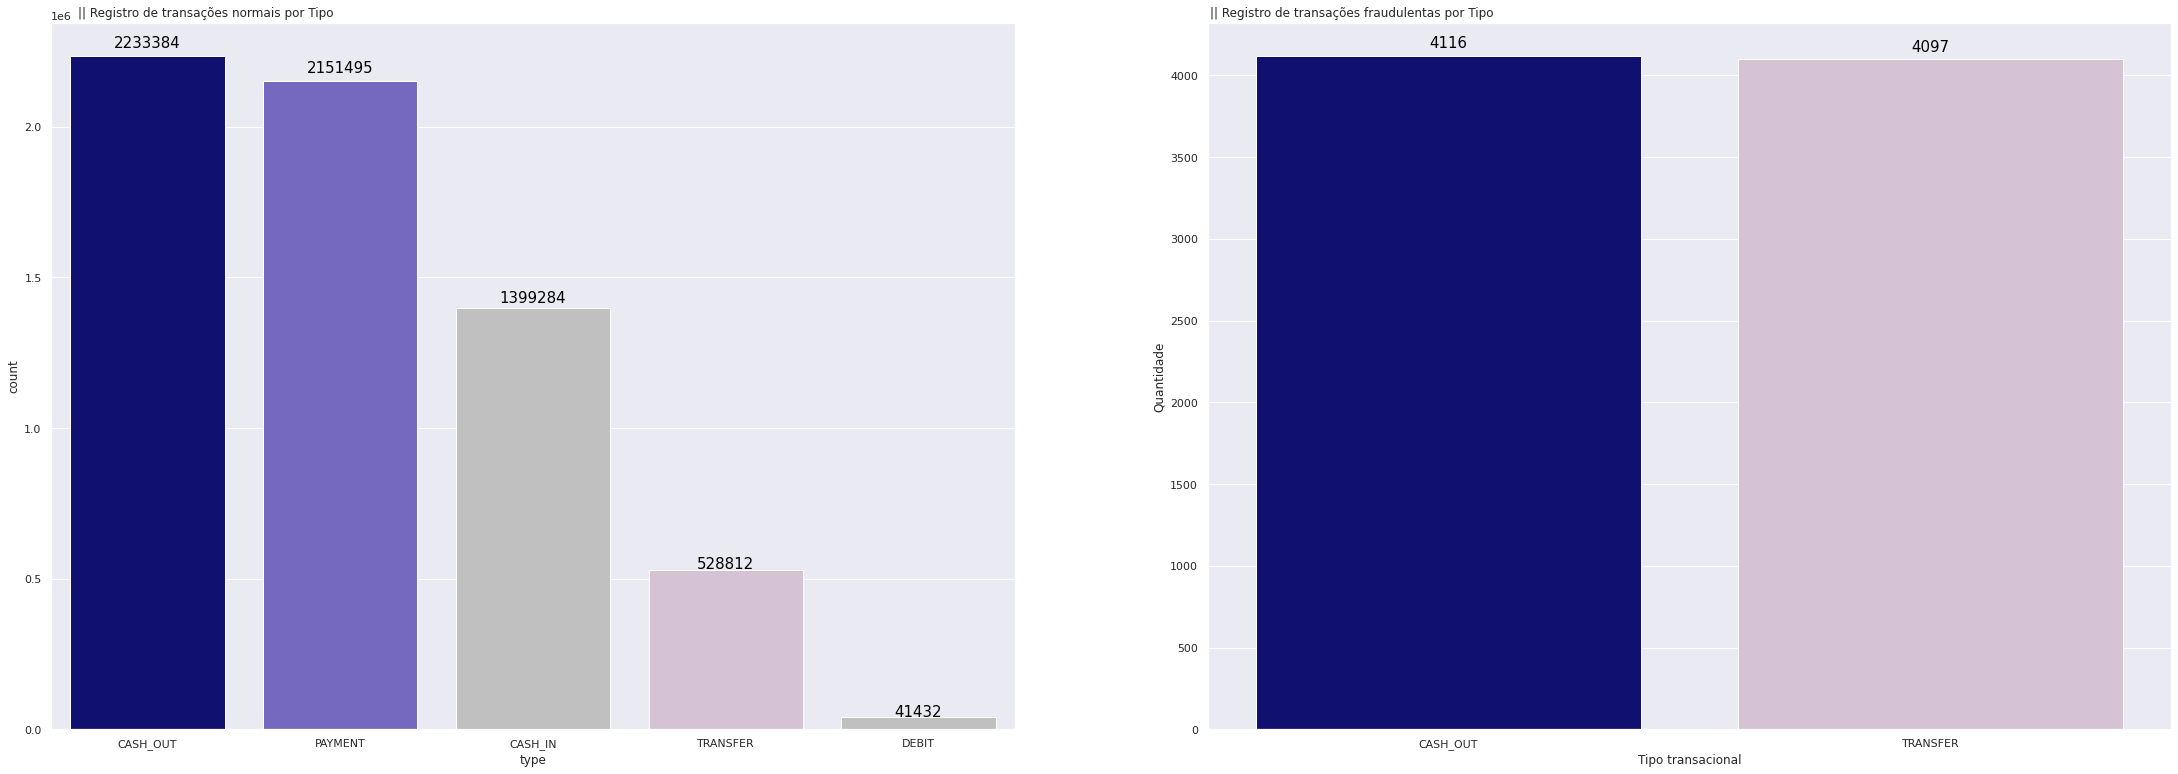

In [44]:
grid = GridSpec( 1,2 )

## First Plot
plt.subplot( grid[0,0] )
ax = sns.countplot(
    data = data_raw[data_raw.is_fraud == 0],
    x = 'type',
    order   = ['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'],
    palette = ['navy', 'slateblue', 'silver', 'thistle', 'silver']
);
plt.title( '|| Registro de transações normais por Tipo', x = 0.16 )
nuter.plot_values_vbar( ax )

###Second Plot
plt.subplot( grid[0,1] )
ax1 = sns.countplot(
    data = data_raw[data_raw.is_fraud == 1],
    x = 'type',
    palette = ['navy', 'thistle'],
    order   = ['CASH_OUT', 'TRANSFER'],

)
ax1.set_xlabel( 'Tipo transacional' )
ax1.set_ylabel( 'Quantidade' )

nuter.plot_values_vbar( ax1 )
plt.title( '|| Registro de transações fraudulentas por Tipo', x = 0.15 );

In [45]:
### Cálculo da redução da base de dados referentes a 1ª hipótese
reduc_perc = ( data[data.type.isin(['CASH_OUT', 'TRANSFER'])].shape[0] * 100 ) / data.shape[0]
print( f'Redução estimada de base de dados a ser analisada em {reduc_perc:.2f}%.'  )

Redução estimada de base de dados a ser analisada em 43.54%.


### 2. Fraudes visam maiores valores transacionais

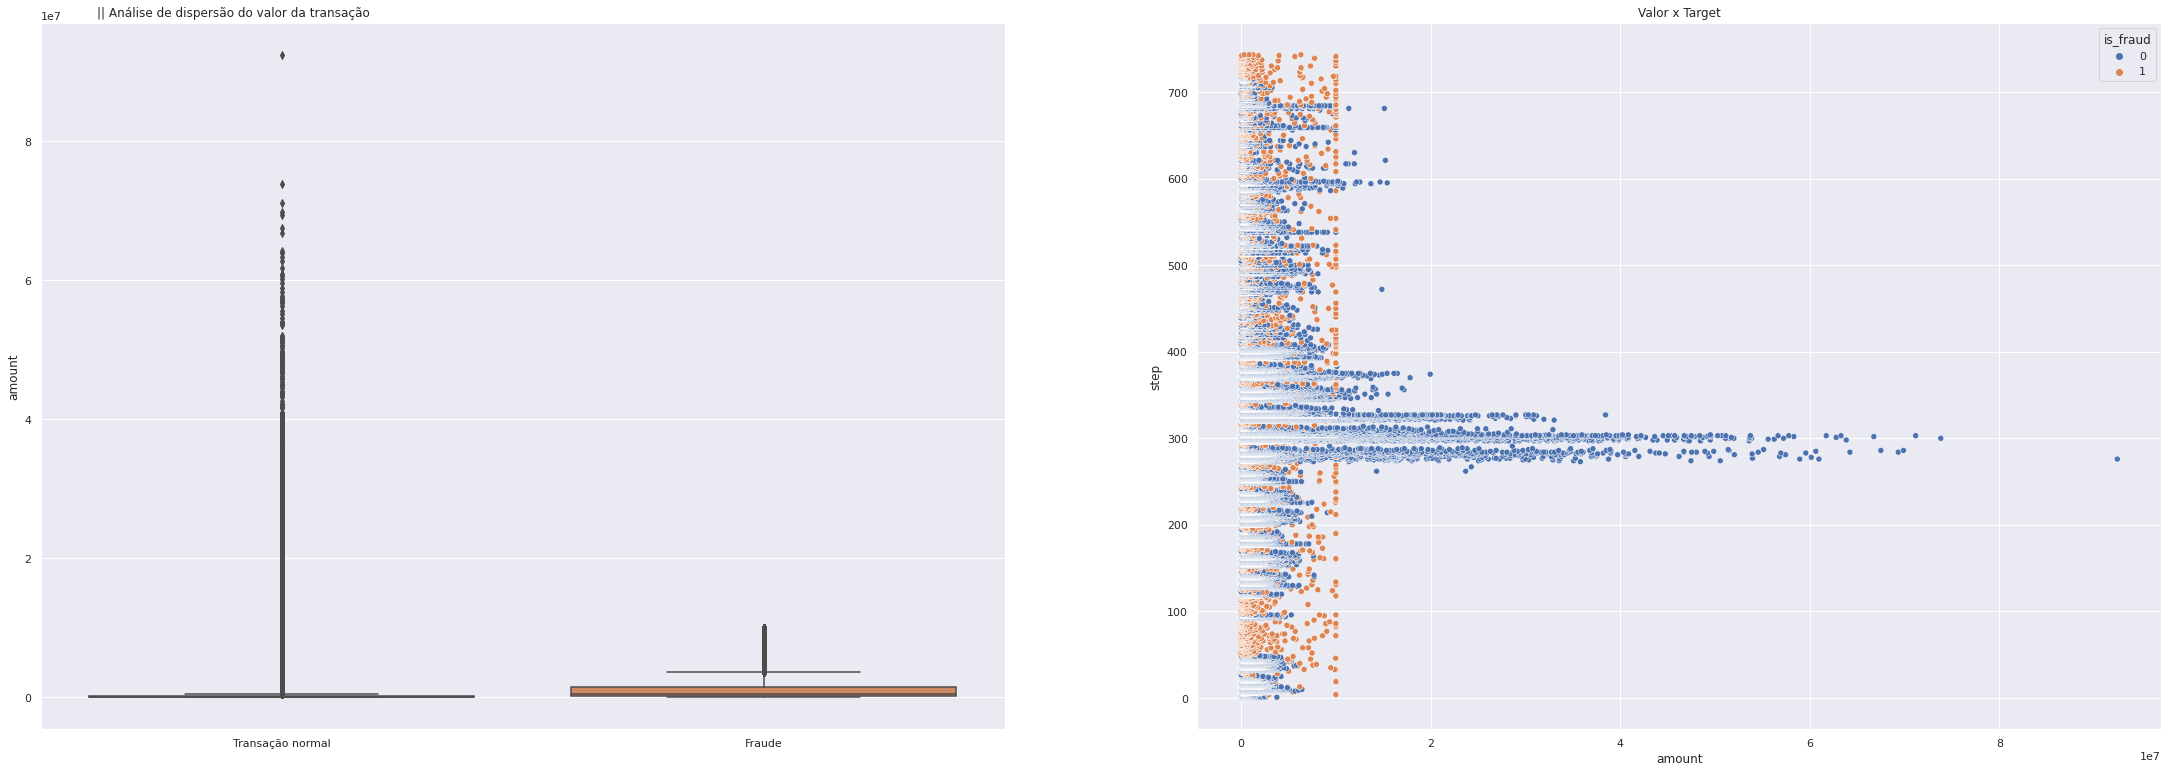

In [48]:
grid = GridSpec(1,2)
## First graph
plt.subplot( grid[0,0] );
ax = sns.boxplot(
    data=data_raw,
    x = data_raw.is_fraud,
    y = data_raw.amount
);
plt.xlabel( '' );
ax.set_xticklabels( ['Transação normal', 'Fraude'] );
plt.title('|| Análise de dispersão do valor da transação', x=0.2);

##Second graph
plt.subplot( grid[0,1] );
ax1 = sns.scatterplot(
    data = data_raw,
    x = 'amount', y = 'step', hue = 'is_fraud'
);
plt.title( 'Valor x Target' );


In [49]:
print(f" Nota: Ao analisar o gráfico, nota-se uma divisão retilínea onde {data_raw.amount[( data_raw.is_fraud == 1 ) & ( data_raw.amount == 10000000 ) ].count()} registro de fraude, tem exatamente esse mesmo valor de 'amount'." )

 Nota: Ao analisar o gráfico, nota-se uma divisão retilínea onde 287 registro de fraude, tem exatamente esse mesmo valor de 'amount'.


### 3. Contas de origem, tendem a ser zeradas em fraudes ;

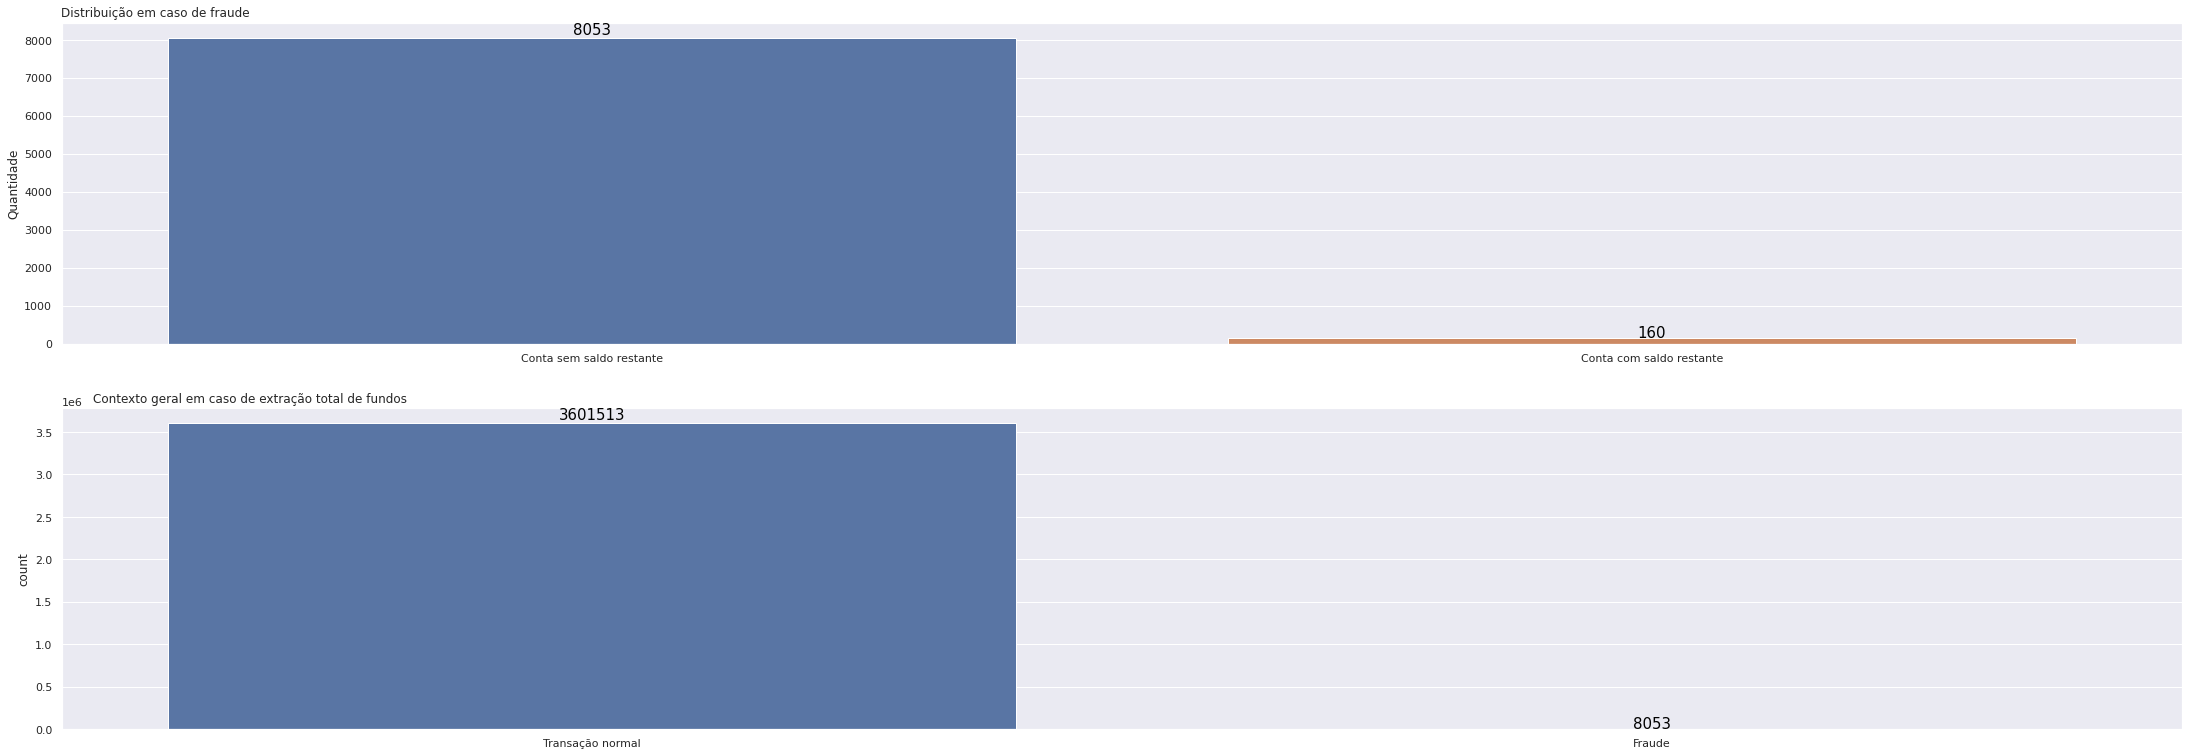

In [25]:
grid = GridSpec( 2,1 )

##First graph
plt.subplot( grid[0,0] )
temp = data_raw.loc[data_raw.is_fraud == 1, 'new_balance_orig']
temp = temp.apply( lambda x : 'Conta sem saldo restante' if x == 0 else 'Conta com saldo restante' )
ax = sns.countplot(
    temp
)
nuter.plot_values_vbar( ax )
plt.xlabel( '' )
plt.title( 'Distribuição em caso de fraude' , x = 0.044);
ax.set_ylabel( 'Quantidade' )

##Second graph
plt.subplot( grid[1,0] )
temp = data_raw[(data_raw.new_balance_orig == 0 )]  
ax1 = sns.countplot(
    temp.is_fraud
);
ax1.set_xticklabels( ['Transação normal', 'Fraude'] )
nuter.plot_values_vbar( ax1 )
plt.title( 'Contexto geral em caso de extração total de fundos' , x = 0.089);
plt.xlabel( '' );

In [13]:
### Criando Data frame auxiliar
df_aux = data_raw

df_aux['difer_saldo'] = df_aux[['old_balance_orig', 'new_balance_orig', 'amount']].apply( lambda x : x['old_balance_orig'] - x['amount'] - x['new_balance_orig'], axis = 1 )        

In [19]:
display( df_aux[df_aux.difer_saldo != 0] )
display( df_aux[( df_aux.difer_saldo != 0 ) & ( df_aux.is_fraud == 1 )] )

,step,type,amount,name_orig,old_balance_orig,new_balance_orig,name_dest,old_balance_dest,new_balance_dest,is_fraud,is_flagged_fraud,difer_saldo
8,1,PAYMENT,4024.360000,C1265012928,2671.000000,0.000000,M1176932104,0.000000,0.000000,0,0,-1353.360000
9,1,DEBIT,5337.770000,C712410124,41720.000000,36382.230000,C195600860,41898.000000,40348.790000,0,0,-0.000000
10,1,DEBIT,9644.940000,C1900366749,4465.000000,0.000000,C997608398,10845.000000,157982.120000,0,0,-5179.940000
13,1,PAYMENT,11633.760000,C1716932897,10127.000000,0.000000,M801569151,0.000000,0.000000,0,0,-1506.760000
15,1,CASH_OUT,229133.940000,C905080434,15325.000000,0.000000,C476402209,5083.000000,51513.440000,0,0,-213808.940000
...,...,...,...,...,...,...,...,...,...,...,...,...
6362462,730,TRANSFER,7316255.050000,C1869569059,17316255.050000,17316255.050000,C1861208726,0.000000,0.000000,1,1,-7316255.050000
6362506,734,TRANSFER,10000000.000000,C1891630790,11810044.850000,1810044.850000,C2124431731,0.000000,0.000000,1,0,-0.000000
6362528,736,TRANSFER,10000000.000000,C412961249,11314660.840000,1314660.840000,C253674970,0.000000,0.000000,1,0,-0.000000
6362582,741,TRANSFER,10000000.000000,C1945606464,15674547.890000,5674547.890000,C625944676,0.000000,0.000000,1,0,0.000000


,step,type,amount,name_orig,old_balance_orig,new_balance_orig,name_dest,old_balance_dest,new_balance_dest,is_fraud,is_flagged_fraud,difer_saldo
724,1,CASH_OUT,416001.330000,C749981943,0.000000,0.000000,C667346055,102.000000,9291619.620000,1,0,-416001.330000
1911,1,CASH_OUT,132842.640000,C13692003,4499.080000,0.000000,C297927961,0.000000,132842.640000,1,0,-128343.560000
4440,4,TRANSFER,10000000.000000,C7162498,12930418.440000,2930418.440000,C945327594,0.000000,0.000000,1,0,-0.000000
14861,8,CASH_OUT,181728.110000,C2102265902,0.000000,0.000000,C789014007,11397.000000,184477.770000,1,0,-181728.110000
25875,8,TRANSFER,1078013.760000,C1026280121,0.000000,0.000000,C277510102,0.000000,970749.680000,1,0,-1078013.760000
...,...,...,...,...,...,...,...,...,...,...,...,...
6362462,730,TRANSFER,7316255.050000,C1869569059,17316255.050000,17316255.050000,C1861208726,0.000000,0.000000,1,1,-7316255.050000
6362506,734,TRANSFER,10000000.000000,C1891630790,11810044.850000,1810044.850000,C2124431731,0.000000,0.000000,1,0,-0.000000
6362528,736,TRANSFER,10000000.000000,C412961249,11314660.840000,1314660.840000,C253674970,0.000000,0.000000,1,0,-0.000000
6362582,741,TRANSFER,10000000.000000,C1945606464,15674547.890000,5674547.890000,C625944676,0.000000,0.000000,1,0,0.000000


### 4. Contas marcadas como fraude, sempre são fraudes

Apesar de verdadeiro, foram marcadas apenas 16 de 8213 transações fraudulentas


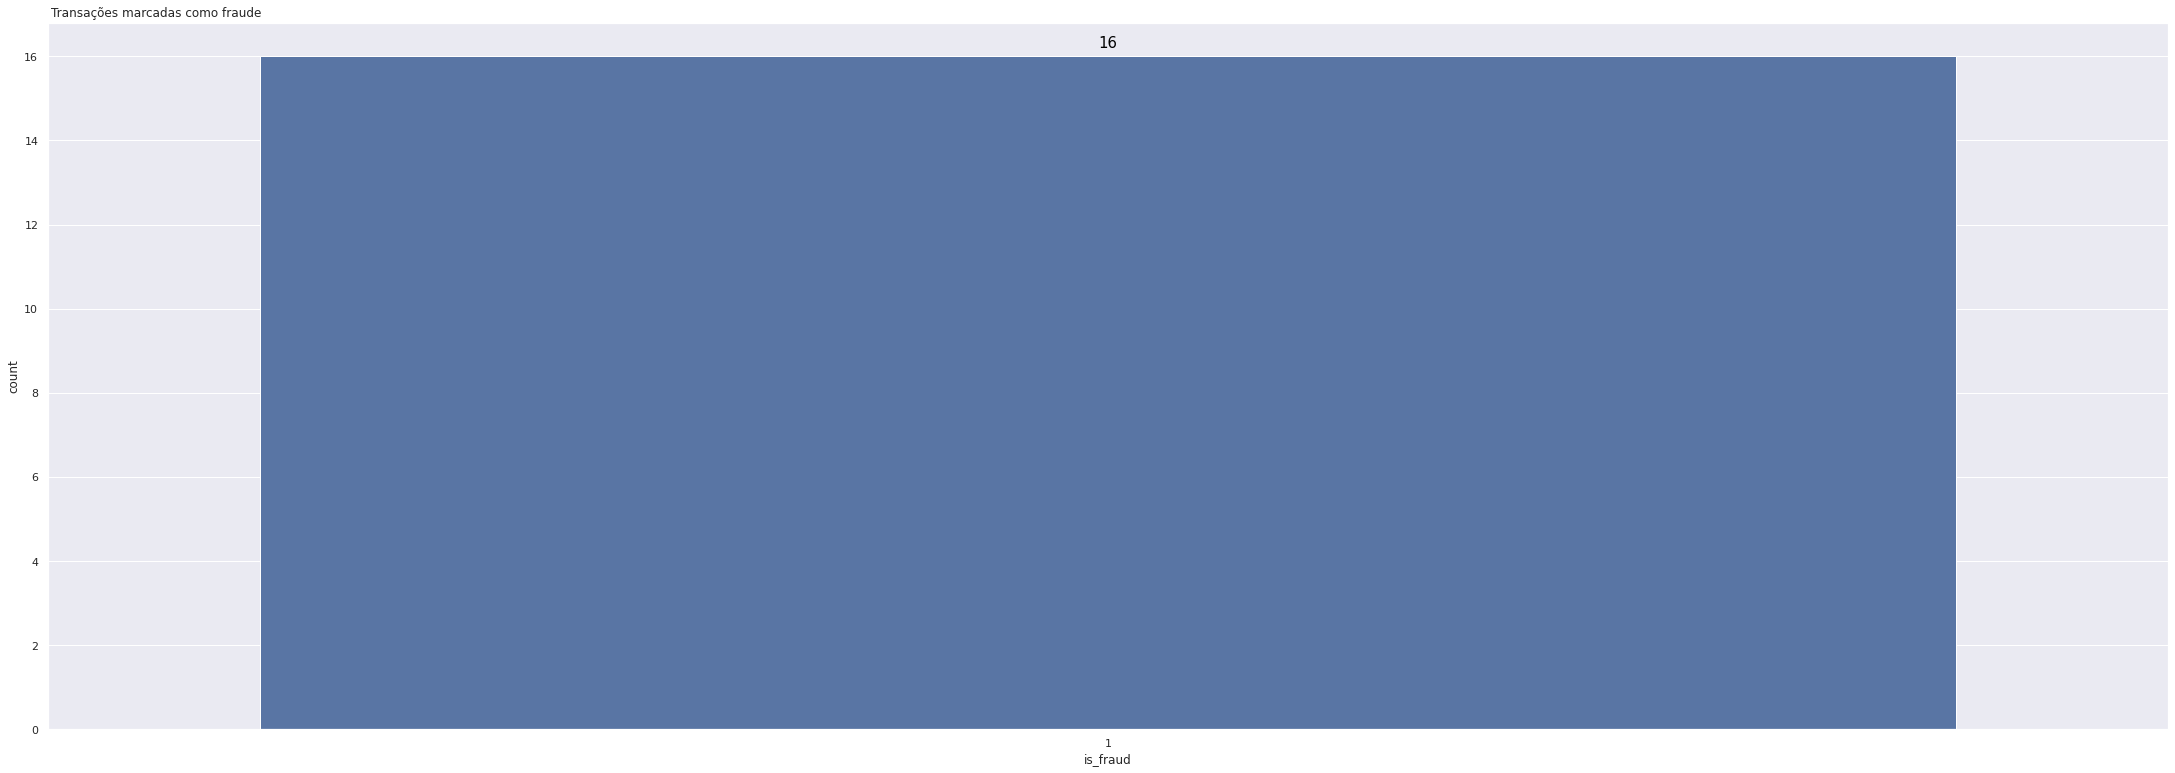

In [51]:
print( f'Apesar de verdadeiro, foram marcadas apenas {data_raw[data_raw.is_flagged_fraud == 1].is_fraud.count()} de {data_raw[data_raw.is_fraud == 1].is_fraud.count()} transações fraudulentas' ),
ax = sns.countplot(
    data_raw[data_raw.is_flagged_fraud == 1].is_fraud
);
nuter.plot_values_vbar( ax )
plt.title( 'Transações marcadas como fraude', x = 0.051 );

## CHECKPOINT

In [52]:
df = data_raw[( data_raw.type == 'CASH_OUT') | ( data_raw.type == 'TRANSFER' )]

In [53]:
df = df.reset_index( drop = True )

In [54]:
pickle.dump( df, open( '../data/pickle/df.sav' , 'wb') )

In [55]:
df = pickle.load( open( '../data/pickle/df.sav', 'rb' ) )

### Data Informations

Os registros fraudulentos correspondem a 0.30% do conjunto total de dados.


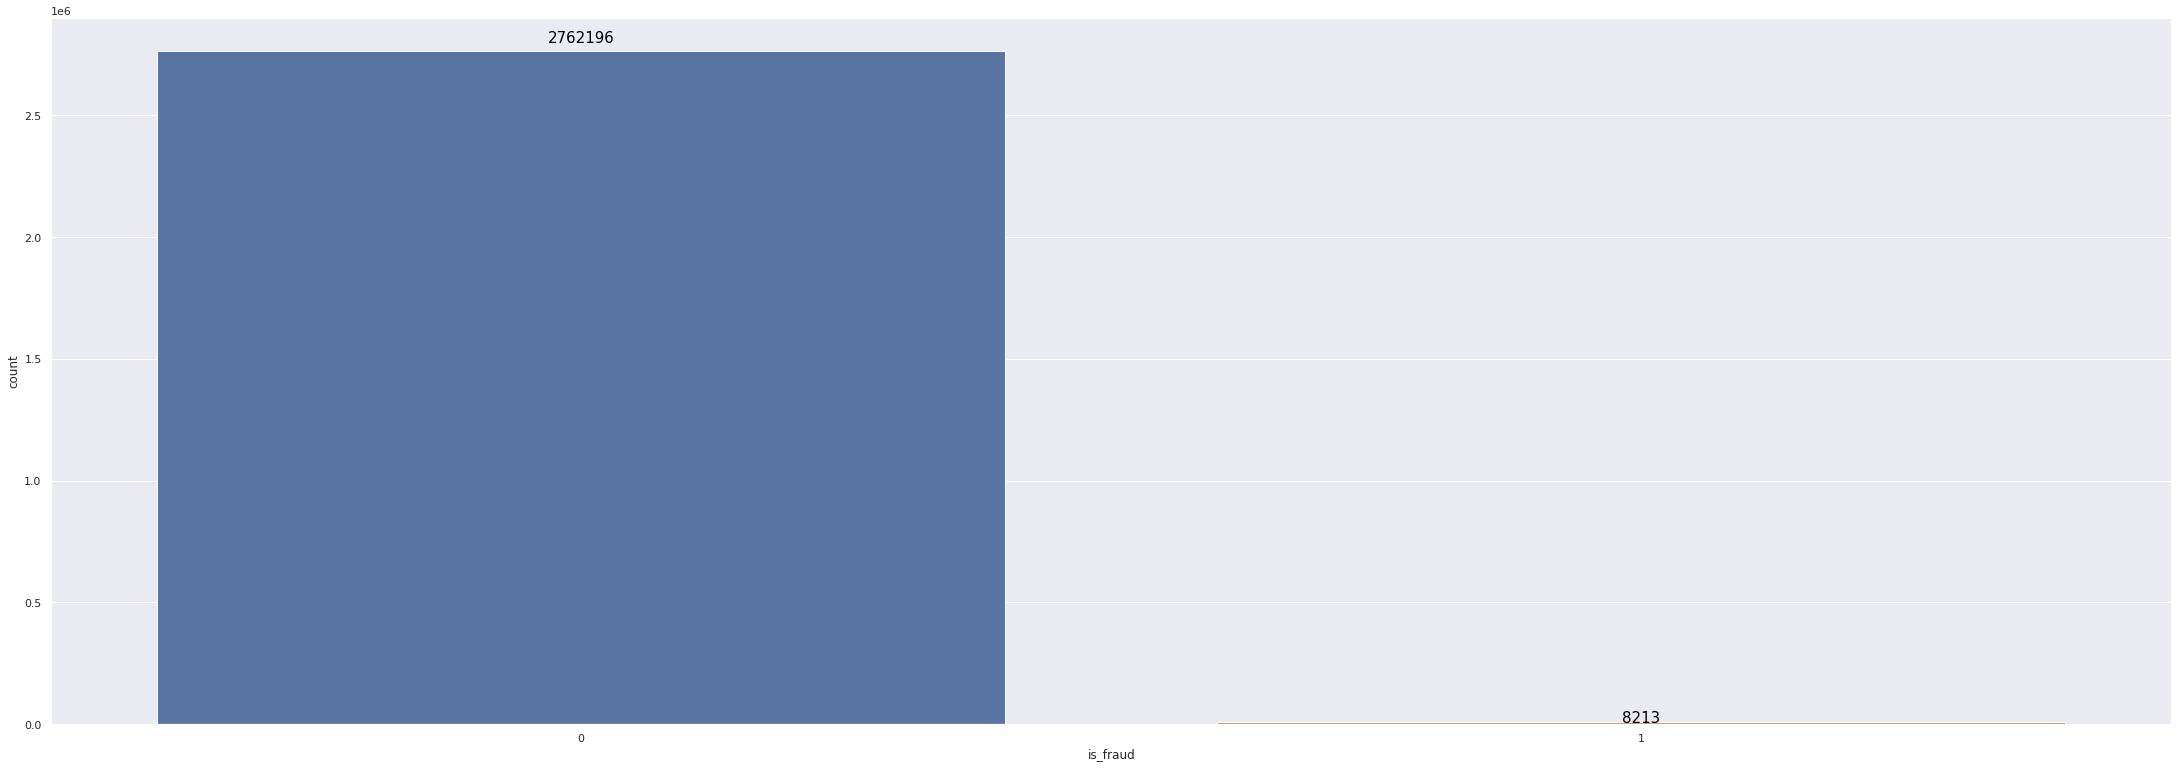

In [56]:
print( f"Os registros fraudulentos correspondem a {( df[df.is_fraud == 1].is_fraud.count() * 100 / df.is_fraud.count() ) :.2f}% do conjunto total de dados." )
ax = sns.countplot(
    df.is_fraud
);
nuter.plot_values_vbar( ax )

    Antes da extração das transações com 'type' onde não haviam fraudes, o percentual de transações fraudulentas com relação ao conjunto total de dados era de ~ 0.13% passando para ~ 0.30%. Melhorando assim, mesmo que em pequena escala, o desbalanceamento dos dados.